This is a Sunny port of SpinW tutorial 4, originally authored by Bjorn Fak and Sandor Toth. The goal is to calculate the spin wave spectrum of Antiferromagnetic square lattice.

Load Packages

In [1]:
using Sunny, GLMakie, CairoMakie  

Define the lattice. Set up the lattice, the position of magnetic atoms, the symmetry inequivalent postions and the spin. Cu+ atoms have spin one and are located at the origin of the cell. The supercell is (2,2,1). "types" can be used to break symmetry between atoms and "subcrystal" can be used to reduce the unit cell to only one type of atom. Here it is trivial.

In [2]:
a=3.0
b=3.0
c=6.0

units=Units(:meV)
latvecs = lattice_vectors(a, b, c, 90, 90, 90) 
positions=[[0, 0, 0]]
types=["Cu1"]
Cu = Crystal(latvecs, positions; types)
cryst=subcrystal(Cu,"Cu1")
GLMakie.activate!()
view_crystal(cryst)

Create a system with a lattice size (2,2,1) since The ordering wave vector is (1/2,1/2,0). The spin is 1.

In [3]:
sys=System(cryst, (2,2,1),[SpinInfo(1,S=1,g=2)], :dipole, seed=0)

System [Dipole mode]
Lattice (2×2×1)×1
Energy per site 0


Set the exchanges on the nearest and 2nd nearest bond. Randomize the spins and then minimize the energy to obtain the ground state. The resulting spin orientation can be plotted.

In [5]:
J1=1.0
J2=-0.1
set_exchange!(sys,J1,Bond(1, 1, [1, 0, 0]))
set_exchange!(sys,J2,Bond(1, 1, [1, 1, 0]))
randomize_spins!(sys)
minimize_energy!(sys)
plot_spins(sys)

┌ Info: Overriding coupling for Bond(1, 1, [1, 0, 0]).
└ @ Sunny /Users/bhushanthipe/.julia/packages/Sunny/lN59K/src/System/Interactions.jl:14
┌ Info: Overriding coupling for Bond(1, 1, [1, 1, 0]).
└ @ Sunny /Users/bhushanthipe/.julia/packages/Sunny/lN59K/src/System/Interactions.jl:14


Create the LSWT object and set up a path. Note that the path goes through the $\Gamma$, $\chi$, M and $\Gamma$ points. Obtain the dispersion and intensity bands.

In [6]:
swt=SpinWaveTheory(sys;measure=ssf_perp(sys))
q_points = [[0,0,0], [1/2,0,0], [1/2,1/2,0], [0,0,0]]
density = 400
path = q_space_path(cryst, q_points, density);
res = intensities_bands(swt, path)

Sunny.BandIntensities{Float64} (4×400 elements)

Plot the results

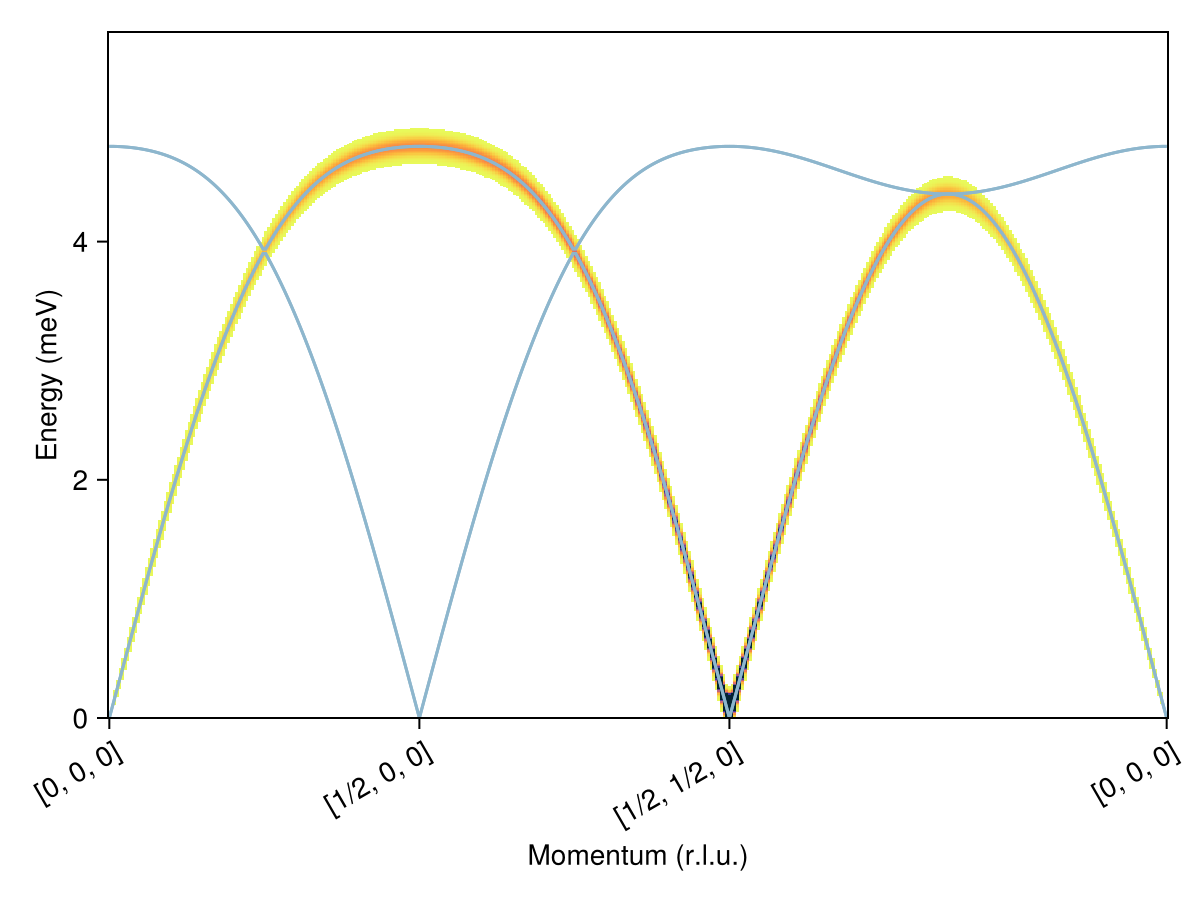

In [7]:
CairoMakie.activate!()
Sunny.BandIntensities{Float64}
plot_intensities(res; units)
